<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/Data_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/JangirSumit/kmeans-clustering/refs/heads/master/driver-data.csv"
df = pd.read_csv(url)

print(df.head())
print(df.describe())

           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25
                 id  mean_dist_day  mean_over_speed_perc
count  4.000000e+03    4000.000000           4000.000000
mean   3.423312e+09      76.041522             10.721000
std    1.154845e+03      53.469563             13.708543
min    3.423310e+09      15.520000              0.000000
25%    3.423311e+09      45.247500              4.000000
50%    3.423312e+09      53.330000              6.000000
75%    3.423313e+09      65.632500              9.000000
max    3.423314e+09     244.790000            100.000000


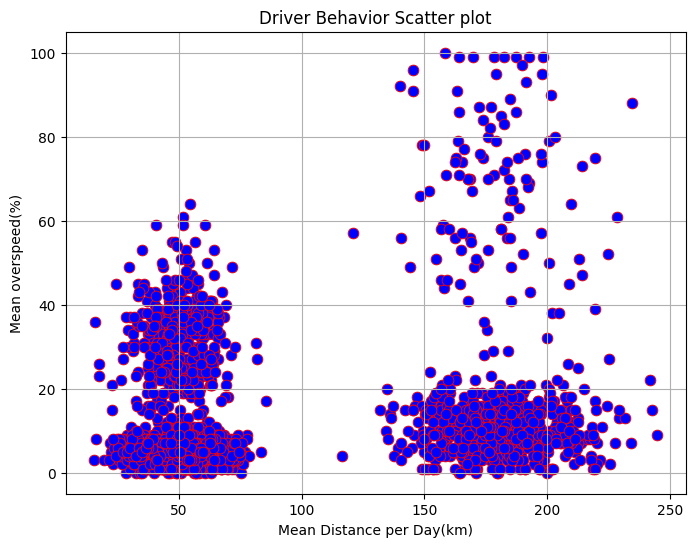

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="mean_dist_day", y="mean_over_speed_perc", s=60,color='blue',edgecolor='red')
plt.title('Driver Behavior Scatter plot')
plt.xlabel('Mean Distance per Day(km)')
plt.ylabel('Mean overspeed(%)')
plt.grid(True)
plt.show()

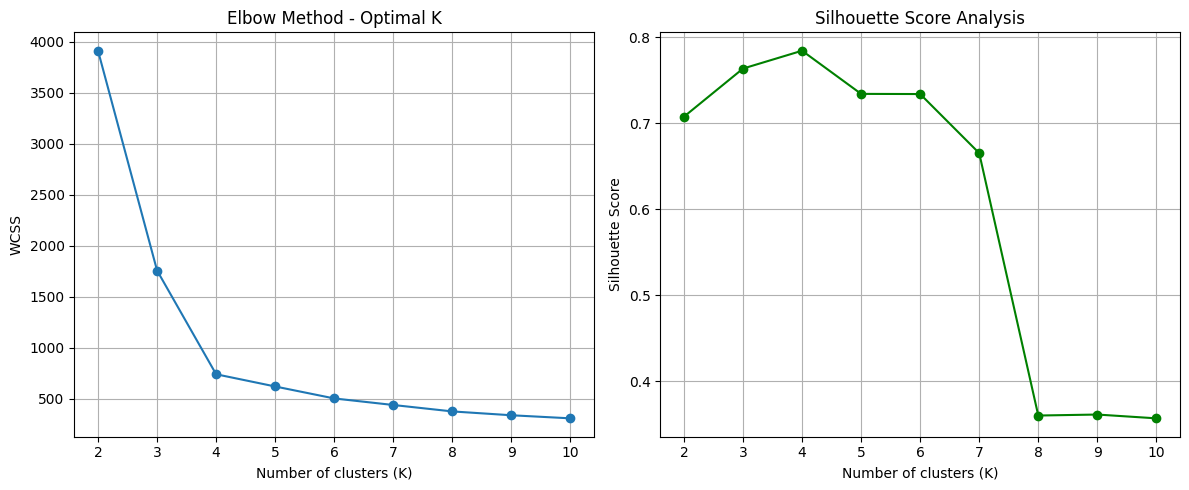

4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = df[['mean_dist_day', 'mean_over_speed_perc']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss=[]
silhouette_scores = []
K_range = range(2,11)

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Return best K based on max silhouette score
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
optimal_k

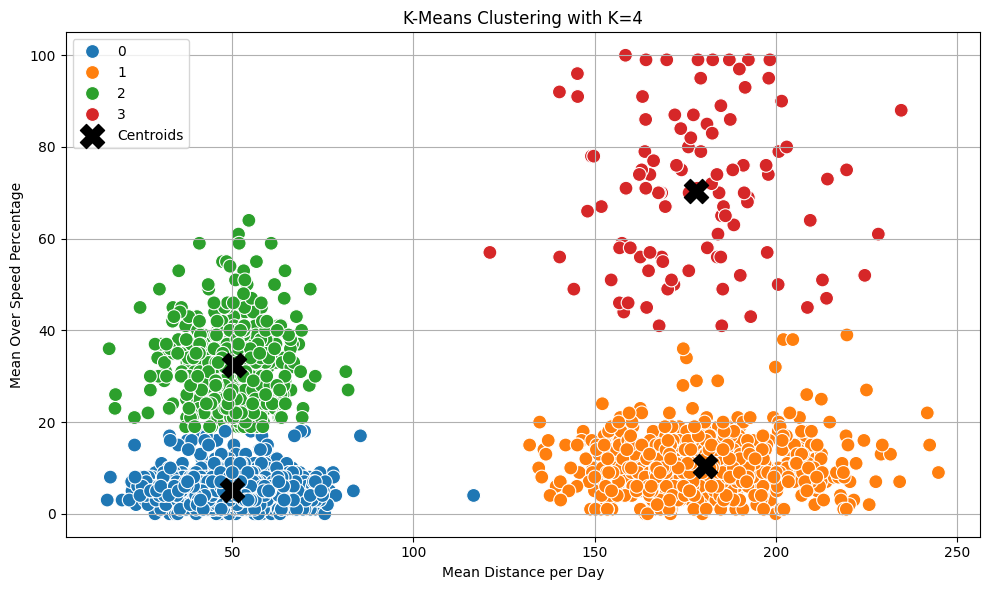

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mean_dist_day', y='mean_over_speed_perc', hue='Cluster', palette='tab10', s=100)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering with K=4')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Hierarchy Clustering Implementation**

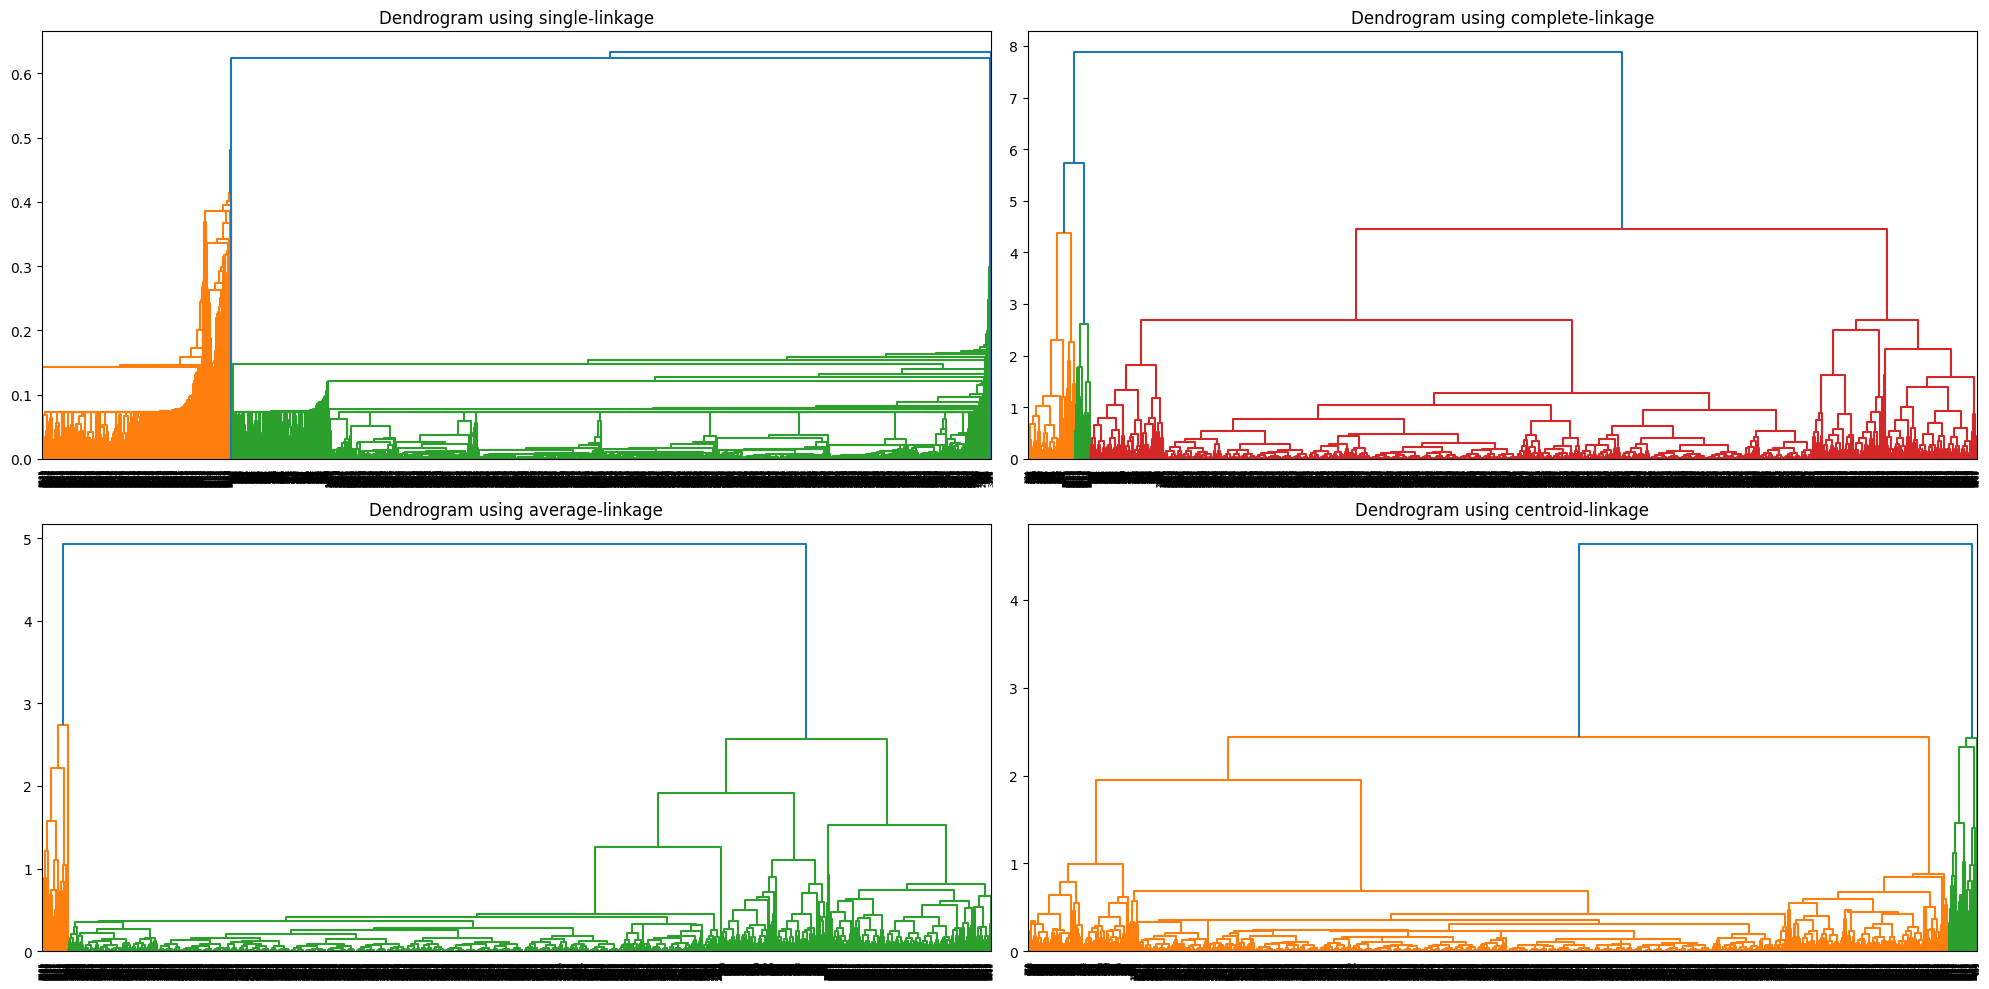

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch


# Linkage methods to analyze
linkage_methods = ['single', 'complete', 'average', 'centroid']

# Plotting dendrograms
plt.figure(figsize=(20, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    #linked = linkage(X_scaled[:100], method=method) #Took only subset of data
    linked = linkage(X_scaled, method=method) #Took only subset of data
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Dendrogram using {method}-linkage')
plt.tight_layout()
plt.show()

# **Clustering on Text Dataset**

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from collections import Counter

df = pd.read_csv("/content/train.csv",header=None, names=["Item ID", "Sentiment", "Tweet"],encoding='latin-1')
df

,Item ID,Sentiment,Tweet
0,ItemID,Sentiment,SentimentText
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
...,...,...,...
99985,99996,0,@Cupcake seems like a repeating problem hop...
99986,99997,1,@cupcake__ arrrr we both replied to each other...
99987,99998,0,@CuPcAkE_2120 ya i thought so
99988,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [ ]:
tweet_list = df['Tweet'].tolist()


In [ ]:
analyzer = SentimentIntensityAnalyzer()
tweetsWithSent = []
pos_num = 0
neg_num = 0
neu_num = 0

for text in tweet_list:
  ps = analyzer.polarity_scores(text)
  tweetsWithSent.append({'text':text, 'compound':ps['compound']})

tweet_df = pd.DataFrame(tweetsWithSent)

sentiment = []
for i in tweet_df['compound']:
  if i >0:
    sentiment.append("Positive")
    pos_num += 1
  elif i < 0:
    sentiment.append("Negative")
    neg_num += 1
  else:
    sentiment.append("Neutral")
    neu_num += 1

tweet_df["Sentiment"] = sentiment
print("Displaying first few records:")
print(tweet_df.head())
print("\nSentiment Distribution:")
print(f"Total Positive = {pos_num}")
print(f"Total Negative = {neg_num}")
print(f"Total Neutral = {neu_num}")


Displaying first few records:
                                                text  compound Sentiment
0                                      SentimentText    0.0000   Neutral
1                       is so sad for my APL frie...   -0.0498  Negative
2                     I missed the New Moon trail...   -0.2960  Negative
3                            omg its already 7:30 :O   -0.2808  Negative
4            .. Omgaga. Im sooo  im gunna CRy. I'...   -0.4767  Negative

Sentiment Distribution:
Total Positive = 52830
Total Negative = 22801
Total Neutral = 24359


In [ ]:
stop_words = stopwords.words('english')
processed_tweets = []

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs

    # Tokenize text
    tokens = word_tokenize(text)

    # Filter out stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into string
    return ' '.join(filtered_tokens)

# Process all tweets
for tweet in tweet_list:
    processed_tweets.append(preprocess_text(tweet))


Feature Extraction Results:
Dimension after Count Vectorizer: (99990, 88039)


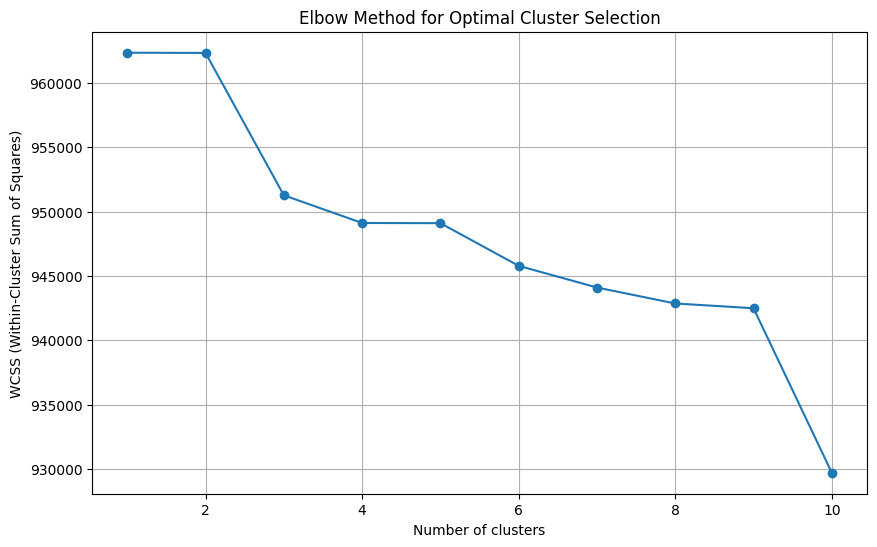


Cluster Distribution (with 3 clusters):
Counter({np.int32(1): 89734, np.int32(2): 10255, np.int32(0): 1})


In [ ]:
# Feature extraction using Count Vectorizer
vectorizer = CountVectorizer(binary=False, min_df=2, ngram_range=(1, 2))
cv_result = vectorizer.fit_transform(processed_tweets)

# Display feature matrix dimensions
print("\nFeature Extraction Results:")
print(f"Dimension after Count Vectorizer: {cv_result.shape}")

# Determine optimal number of clusters using elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cv_result)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Based on the elbow plot, select appropriate number of clusters
optimal_clusters = 3  # This should be determined by examining the elbow plot

# Perform K-means clustering with optimal cluster count
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(cv_result)

# Add cluster information to our DataFrame
tweet_df['cluster'] = clusters

# Display cluster distribution
print(f"\nCluster Distribution (with {optimal_clusters} clusters):")
print(Counter(clusters))


# **Clustering on Image Dataset**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


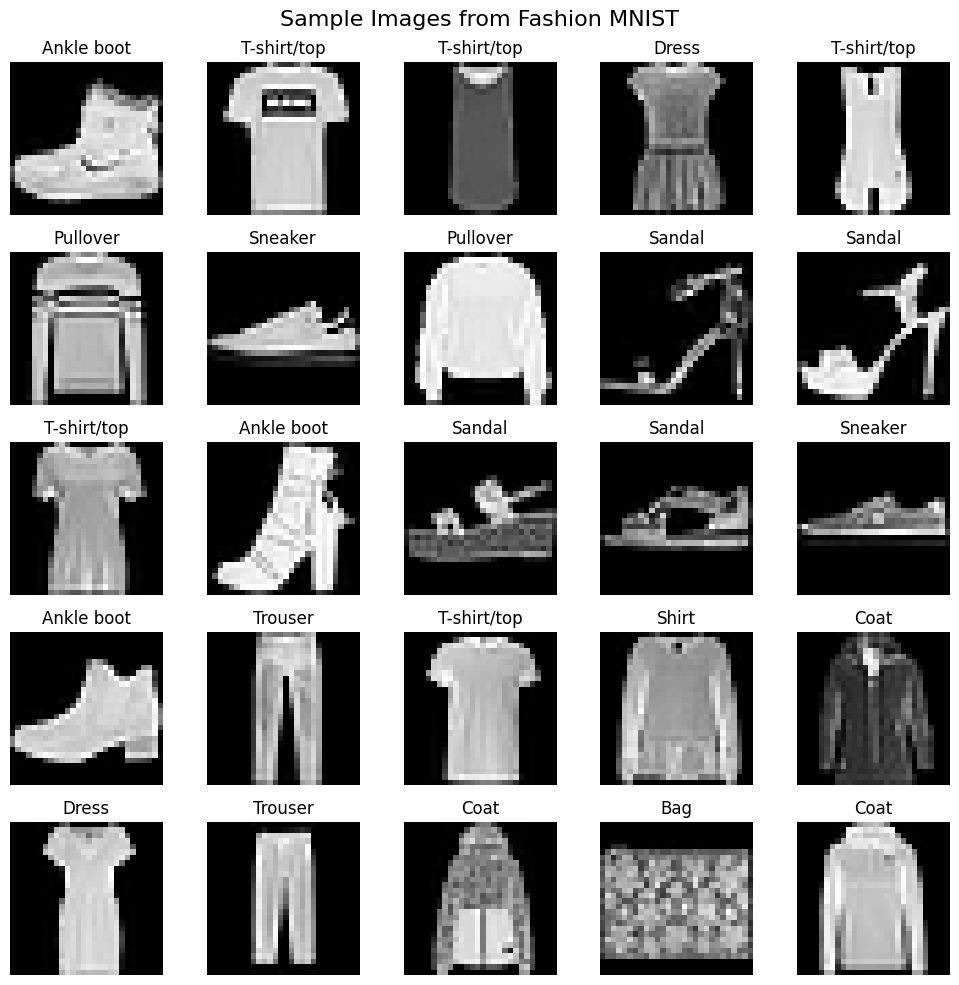

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Step 2: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Step 3: Print dataset dimensions
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Test data shape:", x_test.shape)      # (10000, 28, 28)

# Step 4: Define label names for visualization
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Step 5: Visualize first 25 images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(label_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample Images from Fashion MNIST", fontsize=16)
plt.tight_layout()
plt.show()

New shape of x_train: (60000, 784)
New shape of x_test: (10000, 784)


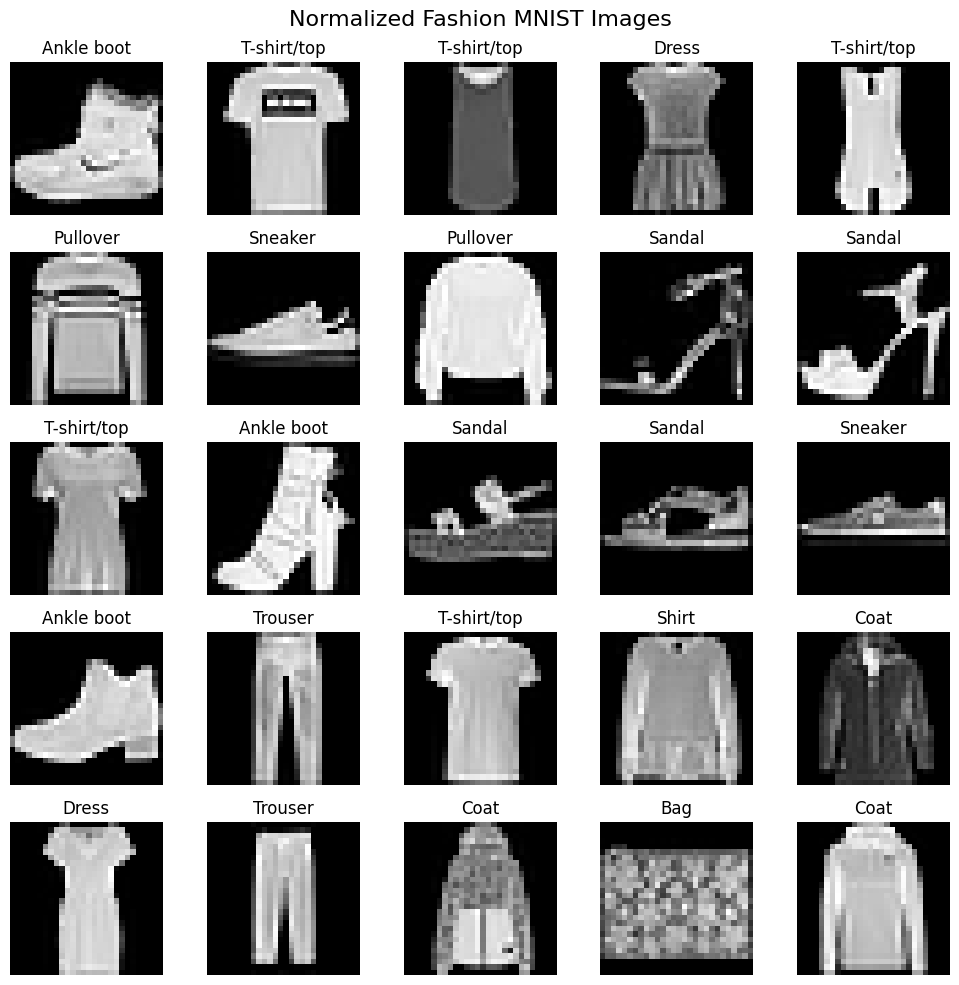

In [ ]:
# Step 1: Reshape the image data from (28, 28) to (784,)
x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)

print("New shape of x_train:", x_train_reshaped.shape)  # (60000, 784)
print("New shape of x_test:", x_test_reshaped.shape)    # (10000, 784)

# Step 2: Normalize pixel values to the range [0, 1]
x_train_normalized = x_train_reshaped / 255.0
x_test_normalized = x_test_reshaped / 255.0

# Step 3: Visualize some normalized images (reshape back to 28x28 for display)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train_normalized[i].reshape(28, 28), cmap='gray')
    plt.title(label_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Normalized Fashion MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

Cluster distribution:
 Predicted
1    9619
4    9078
8    7763
3    7466
6    7391
0    6570
5    4295
7    2903
2    2569
9    2346
Name: count, dtype: int64


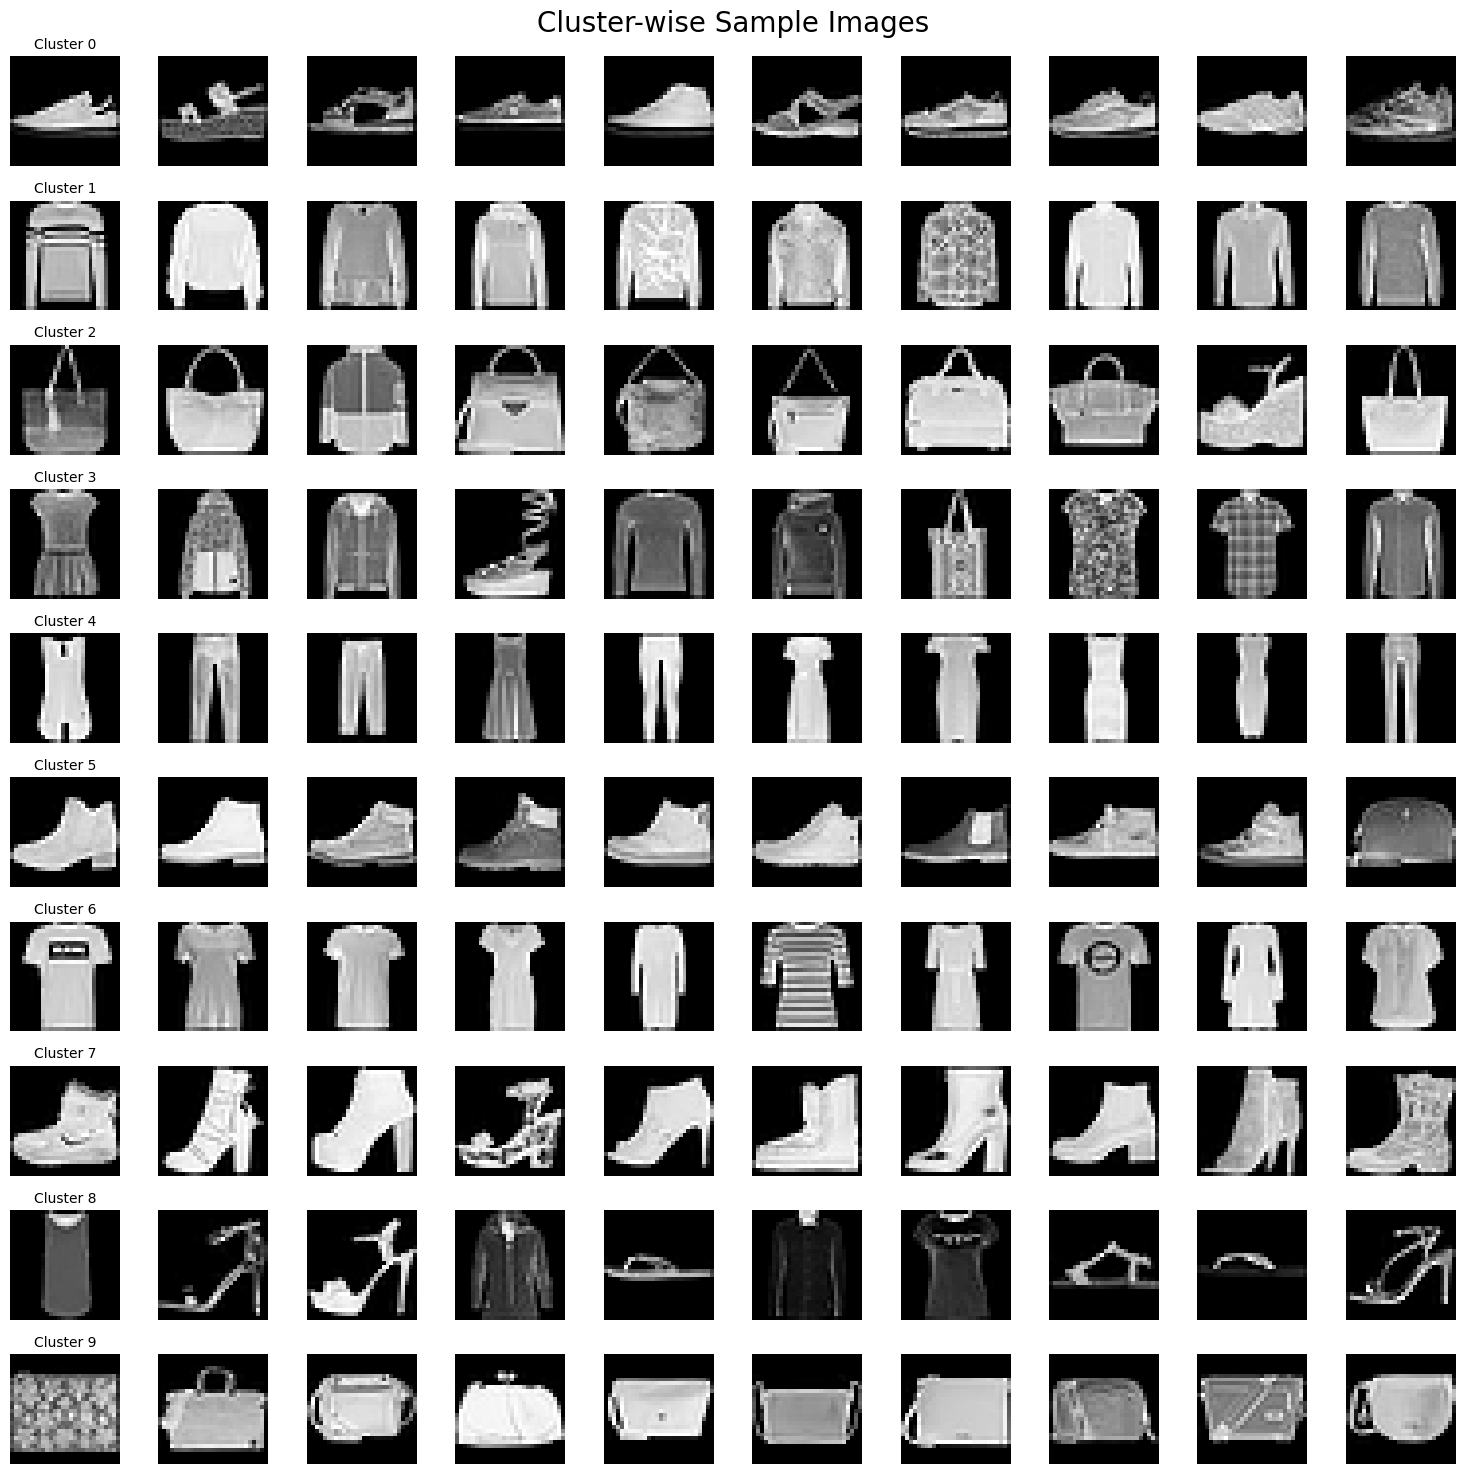

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Apply KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(x_train_normalized)

# Predicted cluster labels for each image
cluster_labels = kmeans.labels_

# Create a DataFrame to map original and predicted clusters
import pandas as pd
kmeans_df = pd.DataFrame({
    'Original': y_train,
    'Predicted': cluster_labels
})

# Show number of images in each cluster
print("Cluster distribution:\n", kmeans_df['Predicted'].value_counts())

# Visualize 10 sample images from each cluster
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for cluster_num in range(10):
    # Get indices of images in the current cluster
    cluster_indices = np.where(cluster_labels == cluster_num)[0][:10]

    for i, idx in enumerate(cluster_indices):
        plt.subplot(10, 10, cluster_num*10 + i + 1)
        plt.imshow(x_train_normalized[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(f"Cluster {cluster_num}", fontsize=10)
plt.suptitle("Cluster-wise Sample Images", fontsize=20)
plt.tight_layout()
plt.show()

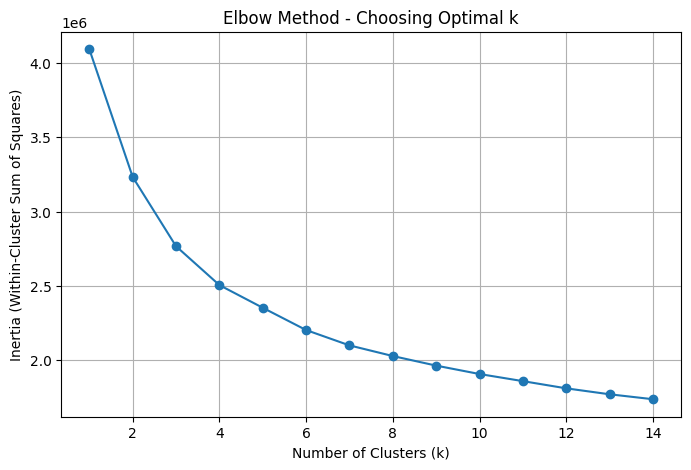

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 15)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(x_train_normalized)
    inertia.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Choosing Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [25]:
from sklearn.metrics import  accuracy_score
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(cluster_labels)
for i in range(10):
    mask = (cluster_labels == i)
    if np.any(mask):
        labels[mask] = mode(y_train[mask])[0]

# Confusion matrix and accuracy

acc = accuracy_score(y_train, labels)


print("Clustering Accuracy: {:.2f}%".format(acc * 100))


Clustering Accuracy: 55.36%


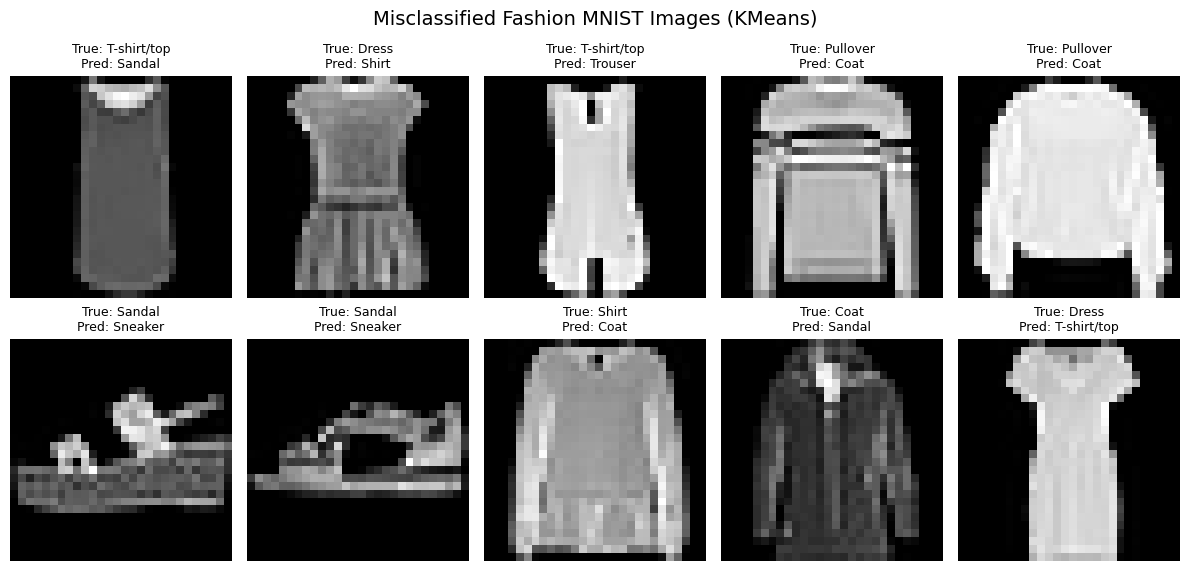

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode

# Fashion MNIST label names
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Remap cluster labels to closest true labels using mode
mapped_labels = np.zeros_like(cluster_labels)
for i in range(10):
    mask = (cluster_labels == i)
    if np.any(mask):
        mapped_labels[mask] = mode(y_train[mask])[0]

# Find misclassified indices
misclassified_indices = np.where(mapped_labels != y_train)[0]

# Plot misclassified images with actual labels
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:10]):
    true_label = label_names[y_train[idx]]
    pred_label = label_names[mapped_labels[idx]]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')

plt.suptitle("Misclassified Fashion MNIST Images (KMeans)", fontsize=14)
plt.tight_layout()
plt.show()